In [ ]:
# Importando bibliotecas necessárias
import nltk
import os
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Cria corpus com comentários negativos
### notas =< 1,5

In [ ]:
corpus_critica_path = 'negativo_polarizado/'
corpus_critica_negativa = PlaintextCorpusReader(corpus_critica_path,'.*')
print('O corpus tem',len(corpus_critica_negativa.fileids()),'textos', 
len(corpus_critica_negativa.words()), 'palavras',len(set(corpus_critica_negativa.words())),'types e', len(corpus_critica_negativa.sents()), 'sentenças')

O corpus tem 27 textos 3035 palavras 982 types e 132 sentenças


In [ ]:
#Calcularemos a diversiade lexical
def lexical_diversity(texto):
    return len(set(texto)) / len(texto)

print("Diversidade do corpus:",100*lexical_diversity(corpus_critica_negativa.words()), '%')

Diversidade do corpus: 32.35584843492587 %


# Cria corpus comentários positivos
### nota >= 4,5

In [ ]:
corpus_critica_path = 'positivo_polarizado/'
corpus_critica_positiva = PlaintextCorpusReader(corpus_critica_path,'.*')
print('O corpus tem',len(corpus_critica_positiva.fileids()),'textos', 
len(corpus_critica_positiva.words()), 'palavras',len(set(corpus_critica_positiva.words())),'types e', len(corpus_critica_positiva.sents()), 'sentenças')

O corpus tem 31 textos 1910 palavras 724 types e 100 sentenças


In [ ]:
print("Diversidade do corpus:", 100*lexical_diversity(corpus_critica_positiva.words()), '%')

Diversidade do corpus: 37.90575916230367 %


# Utilizando Cogroo

In [ ]:
from cogroo_interface import Cogroo
cogroo = Cogroo.Instance()

In [ ]:
classes_cogroo=['n', 'prop', 'art', 'pron', 'pron-pers', 'pron-det',
                'pron-indp', 'adj', 'n-adj', 'v', 'v-fin', 'v-inf',
                'v-pcp', 'v-ger', 'num', 'prp', 'adj', 'conj',
                'conj-s','conj-c', 'intj', 'adv', 'xxx']

def _pos_tags(self):
    pos = {}
    pos.update({"n": "substantivo"})
    pos.update({"prop": "nome próprio"})
    pos.update({"art": "artigo"})
    pos.update({"pron": "pronome"})
    pos.update({"pron-pers": "pronome pessoal"})
    pos.update({"pron-det": "pronome determinativo"})
    pos.update({"pron-indp": "substantivo/pron-indp"})
    pos.update({"adj": "adjetivo"})
    pos.update({"n-adj": "substantivo/adjetivo"})
    pos.update({"v": "verbo"})
    pos.update({"v-fin": "verbo finitivo"})
    pos.update({"v-inf": "verbo infinitivo"})
    pos.update({"v-pcp": "verbo particípio"})
    pos.update({"v-ger": "verbo gerúndio"})
    pos.update({"num": "numeral"})
    pos.update({"prp": "preposição"})
    pos.update({"adj": "adjetivo"})
    pos.update({"conj": "conjunção"})
    pos.update({"conj-s": "conjunção subordinativa"})
    pos.update({"conj-c": "conjunção coordenativa"})
    pos.update({"intj": "interjeição"})
    pos.update({"adv": "advérbio"})
    pos.update({"xxx": "outro"})
    return pos

# pos: "part of speech"
pos = cogroo.pos_tags

# Análise morfológica

In [ ]:
#Lista do que queremos remover
Lista = ['<','>','span','spoiler-heading','spoiler-warning','br','"">','spoiler','="""">', 'class', '=""', '-', 'header', ':', '</', 'class', '=""','.<', '><','"','=']

#Vamos criar uma variável que tenha somente o que queremos
atualizado = [word for word in corpus_critica_positiva.words() if word not in Lista]

#Vamos transformar essa lista em string
Novo = ' '.join(atualizado)
print(Novo)

Final épico e respeitoso com os fãs ... Imperdível ... Conclusão com ação e bastante emoção ... Assistam ... Que Incrível , que final feliz ! Apesar de ver muitas críticas negativas , apenas visões aleatórias , esse último filme dessa nova franquia , se encerra de modo satisfatório ! Não precisa ser um fã tão exigente assim , afinal é aquele filme bem redondinho , cumpre o seu papel ... É Incrível ver Star Wars , e não notar o tempo ! A sua dinâmica é bem estruturada , tem ação , emoção sim , e momentos de bom humor ! Rey é a primeira mulher Jedi a brilhar nessa franquia , a protagonista tem a representatividade necessária ! Elenco com bons personagens em cena também , enfim é imensurável dizer o quão Star Wars é grande e notável , é um autêntico blockbuster e é impossível dizer , que algum filme dessa franquia é ruim . Não vejo o porquê da galera não gosta desse filme , assim como a galera não gosta dos últimos dois , são ótimos !! Melhor filme que já assisti . STAR WARS 9 entrega tud

In [ ]:
doc = cogroo.analyze(str(Novo))

sents_positivo = []

for item in doc.sentences:
    sents_positivo = sents_positivo + item.tokens

tagged_positivo = []

for tokens in sents_positivo:
    aux = re.split(r'#',str(tokens))
    aux2 = re.split(r' ',aux[1])
    if(aux2[0] in classes_cogroo):
        tagged_positivo = tagged_positivo + [(aux[0],aux2[0],aux2[1])]

print(tagged_positivo, end='')

[('Final', 'n', 'M=S'), ('épico', 'adj', 'M=S'), ('e', 'conj-c', '-'), ('respeitoso', 'adj', 'M=S'), ('com', 'prp', '-'), ('os', 'art', 'M=P'), ('fãs', 'n', 'M=P'), ('Imperdível', 'prop', 'M=S'), ('Conclusão', 'n', 'F=S'), ('com', 'prp', '-'), ('ação', 'n', 'F=S'), ('e', 'conj-c', '-'), ('bastante', 'adv', '-'), ('emoção', 'n', 'F=S'), ('Assistam', 'v-fin', 'IMP=3P'), ('Que_Incrível', 'prop', 'M=S'), ('que', 'pron-indp', 'M=S'), ('final', 'n', 'M=S'), ('feliz', 'adj', 'M=S'), ('Apesar_de', 'prp', '-'), ('ver', 'v-inf', '-'), ('muitas', 'pron-det', 'F=P'), ('críticas', 'n', 'F=P'), ('negativas', 'adj', 'F=P'), ('apenas', 'adv', '-'), ('visões', 'n', 'F=P'), ('aleatórias', 'adj', 'F=P'), ('esse', 'pron-det', 'M=S'), ('último', 'adj', 'M=S'), ('filme', 'n', 'M=S'), ('de', 'prp', '-'), ('essa', 'pron-det', 'F=S'), ('nova', 'adj', 'F=S'), ('franquia', 'n', 'F=S'), ('se', 'pron-pers', 'M=3S=ACC'), ('encerra', 'v-fin', 'PR=3S=IND'), ('de', 'prp', '-'), ('modo', 'n', 'M=S'), ('satisfatório', '

Análise do cogroo do corpus de críticas negativas, gerando a matriz tagged_j, incluindo apenas palavras e caracteres com classificações válidas:

In [ ]:
#Lista do que queremos remover
Lista = ['<','>','span','spoiler-heading','spoiler-warning','br','"">','spoiler','="""">', 'class', '=""', '-', 'header', ':', '</', 'class', '=""','.<', '><','"','=']

#Vamos criar uma variável que tenha somente o que queremos
atualizado2 = [word for word in corpus_critica_negativa.words() if word not in Lista]

#Vamos transformar essa lista em string
Novo2 = ' '.join(atualizado2)
print(Novo2)

Pior filme da saga . Fraco . Enredo e roteiro confuso e preguiçoso . Mais do mesmo . Falhas mortais . Muita coisa desnecessária . Nem poderia ser chamado de Star Wars . Coitado do Gerorge Lucas . Filme fraco , enredo Hollywoodiano forçado , tentam reciclar a história uma história que já foi contada antes adicionando muitos efeitos especiais em 3D . Sinceramente , um final triste pra uma trilogia fraca . =" container onclick =""> =" "> =" content "> O beijo da Rey foi DE CAIR O C * DA BUNDA !!!! Sai do cinema meio triste , afinal sou fã da saga . Mas devo dizer que o trabalho dos atores foi muito bom , ótimos profissionais . Realmente , a culpa pra esse trabalho terrível é da disney e diretores . Essa nova trilogia e o seu desfecho não é nada mais o mais do mesmo ". George lucas foi aquele que o criou e o criou com maestria . J . J . Abrams apenas o imitou com exageros superficiais . Bons atores mas em um filme medíocre . Sem nada de novo e sem nada criativo . Enfim , Star Wars ja foi b

In [ ]:
doc2 = cogroo.analyze(str(Novo2))

sents_negativo = []

for item in doc2.sentences:
    sents_negativo = sents_negativo + item.tokens

tagged_negativo = []



for tokens in sents_negativo:
    aux = re.split(r'#',str(tokens))
    aux2 = re.split(r' ',aux[1])
    if(aux2[0] in classes_cogroo):
        tagged_negativo = tagged_negativo + [(aux[0],aux2[0],aux2[1])]

print(tagged_negativo, end='')

[('Pior', 'adj', 'M=S'), ('filme', 'n', 'M=S'), ('de', 'prp', '-'), ('a', 'art', 'F=S'), ('saga', 'n', 'F=S'), ('Fraco', 'prop', 'M=S'), ('Enredo', 'prop', 'M=S'), ('e', 'conj-c', '-'), ('roteiro', 'n', 'M=S'), ('confuso', 'adj', 'M=S'), ('e', 'conj-c', '-'), ('preguiçoso', 'adj', 'M=S'), ('Mais', 'adv', '-'), ('de', 'prp', '-'), ('o', 'art', 'M=S'), ('mesmo', 'n', 'M=S'), ('Falhas', 'n', 'F=P'), ('mortais', 'adj', 'F=P'), ('Muita', 'pron-det', 'F=S'), ('coisa', 'n', 'F=S'), ('desnecessária', 'adj', 'F=S'), ('Nem', 'adv', '-'), ('poderia', 'v-fin', 'COND=3S'), ('ser', 'v-inf', '-'), ('chamado', 'v-pcp', 'M=S'), ('de', 'prp', '-'), ('Star_Wars', 'prop', 'M=S'), ('Coitado', 'n', 'M=S'), ('de', 'prp', '-'), ('o', 'art', 'M=S'), ('Gerorge_Lucas', 'prop', 'M=S'), ('Filme', 'n', 'M=S'), ('fraco', 'adj', 'M=S'), ('enredo', 'n', 'M=S'), ('Hollywoodiano', 'prop', 'M=S'), ('forçado', 'v-pcp', 'M=S'), ('tentam', 'v-fin', 'PR=3P=IND'), ('reciclar', 'v-inf', '-'), ('a', 'art', 'F=S'), ('história', 

# Análise verbos, adjetivos

In [ ]:
#positivas

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#biblioteca para os gráficos
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def lematiza(tagged,classe):
    aux = ''
    i = 0
    for x in tagged:
        if (pos[ tagged [i][1] ] == classe):
            aux  += cogroo.lemmatize( tagged[i][0] ) + ' '
        i = i + 1
    return aux

In [ ]:

def plota_grafico_freq(fDist_adj_k, positivo_ou_negativo, classe):
    x=fDist_adj_k.most_common(40)
    types=[w for (w,f) in x]
    freq=[f for (w,f) in x]

    plt.rcParams["figure.figsize"] = [16,8]

    matplotlib.rcParams.update({'font.size': 15})

    x = np.arange(len(types))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x,freq, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Ocorrências')

    ax.set_title('frequência de ' + classe + ' nos comentários ' + positivo_ou_negativo)
    ax.set_xticks(x)
    ax.set_xticklabels(types)
    ax.set_xlabel(classe)
    ax.legend()
    ax.tick_params(axis ='x', rotation = 90)
    fig.tight_layout()


    plt.show()

In [ ]:
adjetivos_j = lematiza(tagged_positivo, 'adjetivo')

#Tokenizar a string
tokens_pos = word_tokenize(adjetivos_j)

#Gerar a distribuição de frequência
fDist_adj_pos = FreqDist(word for word in tokens_pos)

fDist_adj_pos

FreqDist({'ótimo': 11, 'bom': 7, 'melhor': 6, 'último': 5, 'nova': 4, 'maior': 4, 'novo': 4, 'épico': 3, 'increr': 3, 'emocionante': 3, ...})

No handles with labels found to put in legend.


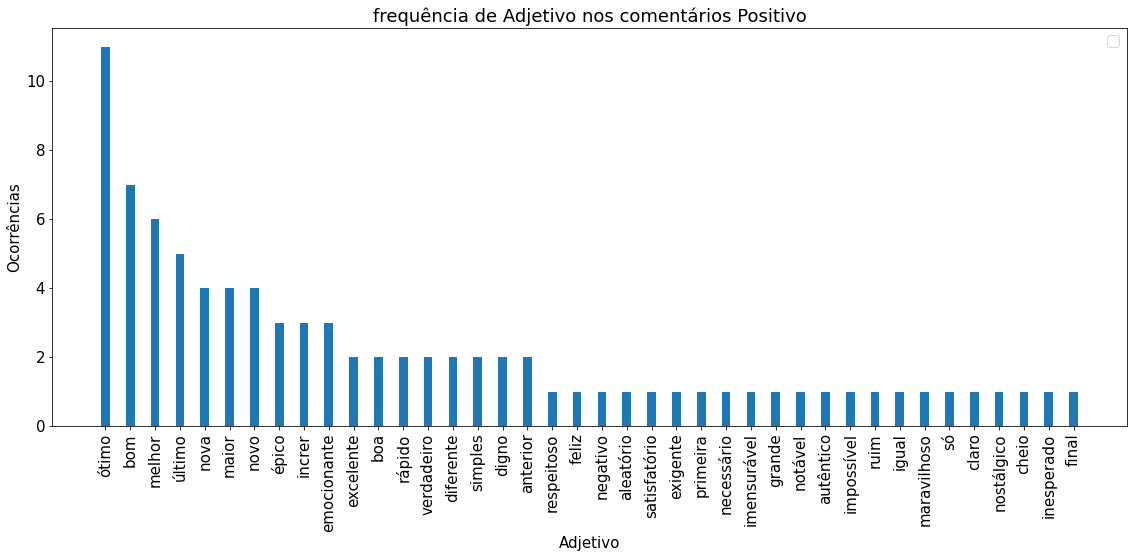

In [ ]:
plota_grafico_freq(fDist_adj_pos,'Positivo','Adjetivo')

In [ ]:
#função lematiza
substantivos_pos = lematiza(tagged_positivo,'substantivo')

#Tokenizar a string
tokens_pos = word_tokenize(substantivos_pos)

#Gerar a distribuição de frequência
fDist_subst_pos = FreqDist(word for word in tokens_pos)

fDist_subst_pos

FreqDist({'filme': 47, 'final': 10, 'saga': 8, 'fã': 6, 'história': 6, 'tempo': 5, 'ação': 4, 'franquia': 4, 'coisa': 4, 'episódio': 4, ...})

No handles with labels found to put in legend.


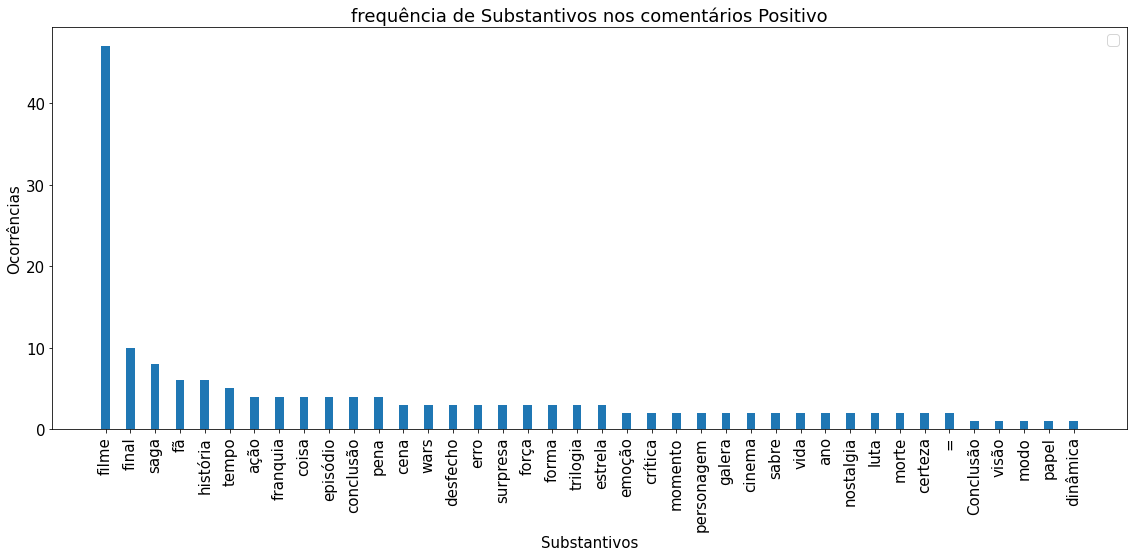

In [ ]:
plota_grafico_freq(fDist_subst_pos,'Positivo','Substantivos')

In [ ]:
verbo_inf = lematiza(tagged_positivo, "verbo infinitivo")
verbo_fin = lematiza(tagged_positivo, "verbo finitivo")
verbo_pcp = lematiza(tagged_positivo, "verbo particípio")
verbo_ger = lematiza(tagged_positivo, "verbo gerúndio")

verbos_pos = verbo_inf + verbo_fin + verbo_pcp + verbo_ger

tokens_verbos = word_tokenize(verbos_pos)
fDist_verb_pos = FreqDist(word for word in tokens_verbos)
fDist_verb_pos

FreqDist({'ser': 51, 'ir': 21, 'ter': 16, 'gostar': 10, 'assistir': 6, 'fazer': 6, 'achar': 6, 'ver': 5, 'dizer': 5, 'poder': 5, ...})

No handles with labels found to put in legend.


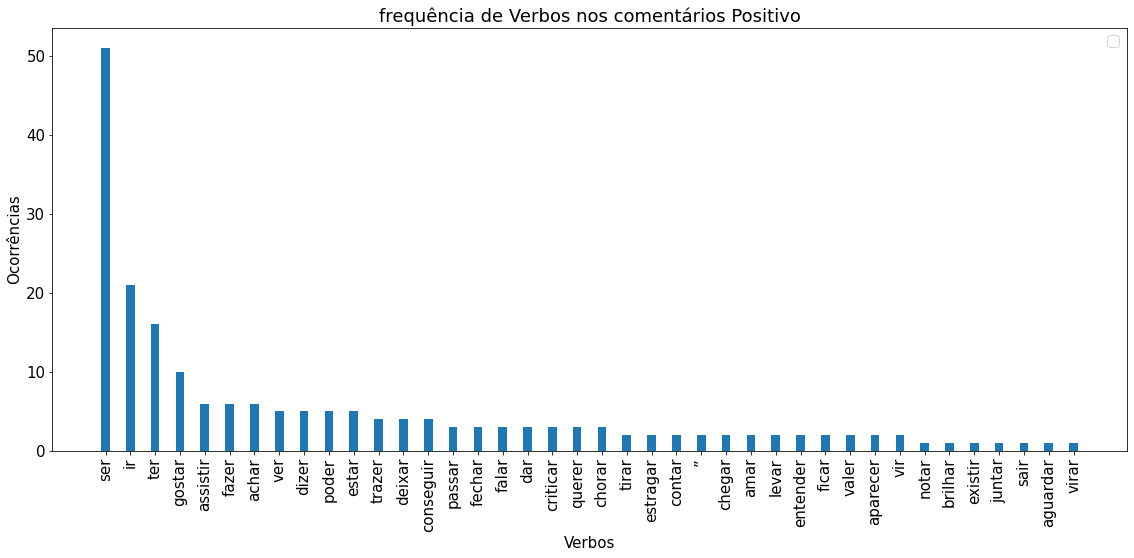

In [ ]:
plota_grafico_freq(fDist_verb_pos,'Positivo','Verbos')

In [ ]:
#função lematiza
conjc_pos = lematiza(tagged_positivo,'conjunção coordenativa')

#Tokenizar a string
tokens_conjc = word_tokenize(conjc_pos)

#Gerar a distribuição de frequência
fDist_conjc_pos = FreqDist(word for word in tokens_conjc)

fDist_conjc_pos

FreqDist({'e': 47, 'mas': 15, 'ou': 3})

## negativos

In [ ]:
adjetivos = lematiza(tagged_negativo, 'adjetivo')

#Tokenizar a string
tokens_k = word_tokenize(adjetivos)

#Gerar a distribuição de frequência
fDist_adj_k = FreqDist(word for word in tokens_k)

fDist_adj_k

FreqDist({'pior': 10, 'fraco': 7, 'melhor': 7, 'final': 6, 'bom': 5, 'novo': 5, 'último': 5, 'nova': 4, 'boa': 4, 'ruim': 4, ...})

No handles with labels found to put in legend.


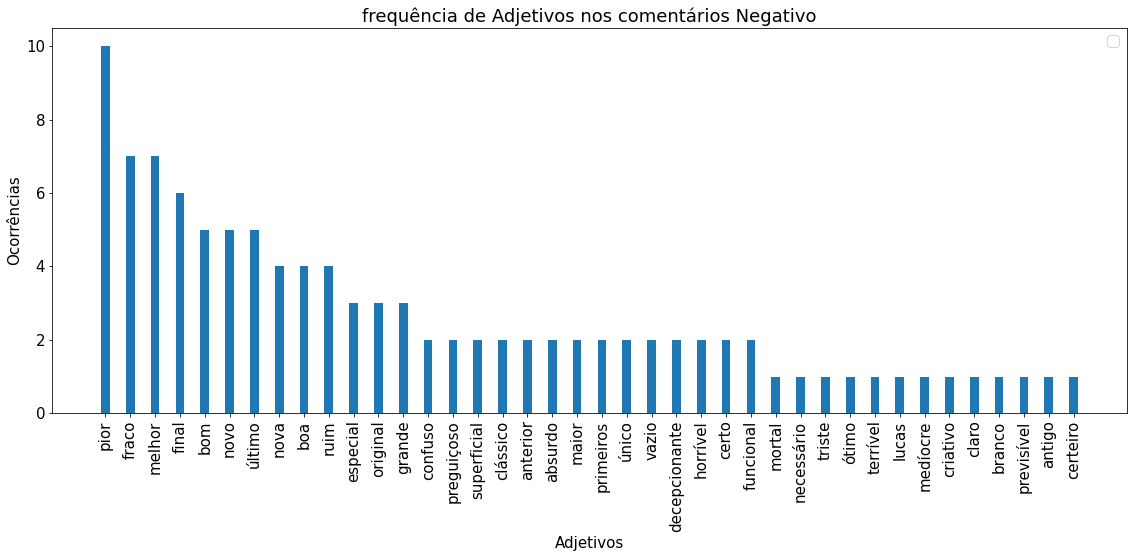

In [ ]:
plota_grafico_freq(fDist_adj_k,'Negativo','Adjetivos')

In [ ]:
verbo_inf = lematiza(tagged_negativo, "verbo infinitivo")
verbo_fin = lematiza(tagged_negativo, "verbo finitivo")
verbo_pcp = lematiza(tagged_negativo, "verbo particípio")
verbo_ger = lematiza(tagged_negativo, "verbo gerúndio")

verbos = verbo_inf + verbo_fin + verbo_pcp + verbo_ger

tokens_k = word_tokenize(verbos)
fDist_verb_neg = FreqDist(word for word in tokens_k)
fDist_verb_neg

FreqDist({'ser': 92, 'ir': 31, 'ter': 24, 'fazer': 20, 'poder': 12, 'tentar': 10, '=': 8, 'ver': 7, 'destruir': 7, 'gostar': 6, ...})

No handles with labels found to put in legend.


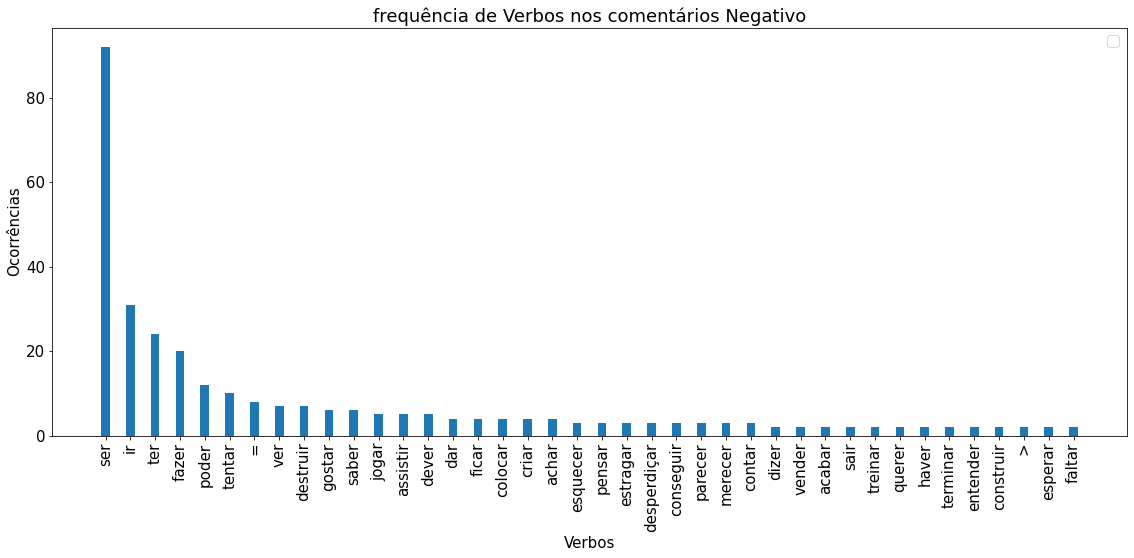

In [ ]:
plota_grafico_freq(fDist_verb_neg,'Negativo','Verbos')

In [ ]:
#função lematiza
substantivos_neg = lematiza(tagged_negativo,'substantivo')

#Tokenizar a string
tokens_neg = word_tokenize(substantivos_neg)

#Gerar a distribuição de frequência
fDist_subst_neg = FreqDist(word for word in tokens_neg)

fDist_subst_neg

FreqDist({'filme': 54, 'trilogia': 16, 'personagem': 15, '=': 13, 'saga': 11, 'roteiro': 10, 'história': 10, 'final': 9, '>': 9, 'content': 8, ...})

No handles with labels found to put in legend.


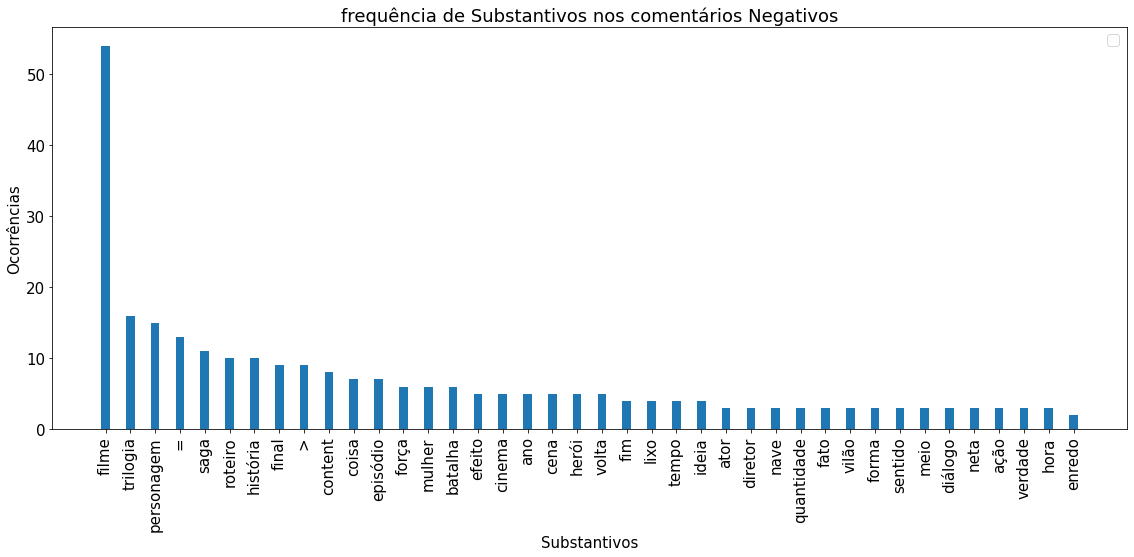

In [ ]:
plota_grafico_freq(fDist_subst_neg,'Negativos','Substantivos')

In [ ]:
#função lematiza
conjc_neg = lematiza(tagged_negativo,'conjunção coordenativa')

#Tokenizar a string
tokensc_neg = word_tokenize(conjc_neg)

#Gerar a distribuição de frequência
fDist_conjc_neg = FreqDist(word for word in tokensc_neg)

fDist_conjc_neg

FreqDist({'e': 69, 'mas': 21, 'ou': 1})

# Comparação

In [ ]:
mais_comuns_neg = []
mais_comuns_pos = []
for i in range(15):
    mais_comuns_neg.append(fDist_verb_neg.most_common()[i][0])
    mais_comuns_pos.append(fDist_verb_pos.most_common()[i][0])

In [ ]:
print(mais_comuns_pos)

['ser', 'ir', 'ter', 'gostar', 'assistir', 'fazer', 'achar', 'ver', 'dizer', 'poder', 'estar', 'trazer', 'deixar', 'conseguir', 'passar']


In [ ]:
print(mais_comuns_neg)

['ser', 'ir', 'ter', 'fazer', 'poder', 'tentar', '=', 'ver', 'destruir', 'gostar', 'saber', 'jogar', 'assistir', 'dever', 'dar']


In [ ]:
elementos_comuns = []
print(len(mais_comuns_pos))
for element in mais_comuns_neg:
    if element in mais_comuns_pos:
        elementos_comuns.append(element)

# mostra elementos que estão no top 15 de repetições tanto nas críticas positivas quanto nas negativas
print(elementos_comuns)

15
['ser', 'ir', 'ter', 'fazer', 'poder', 'ver', 'gostar', 'assistir']


No handles with labels found to put in legend.
<FreqDist with 157 samples and 249 outcomes>


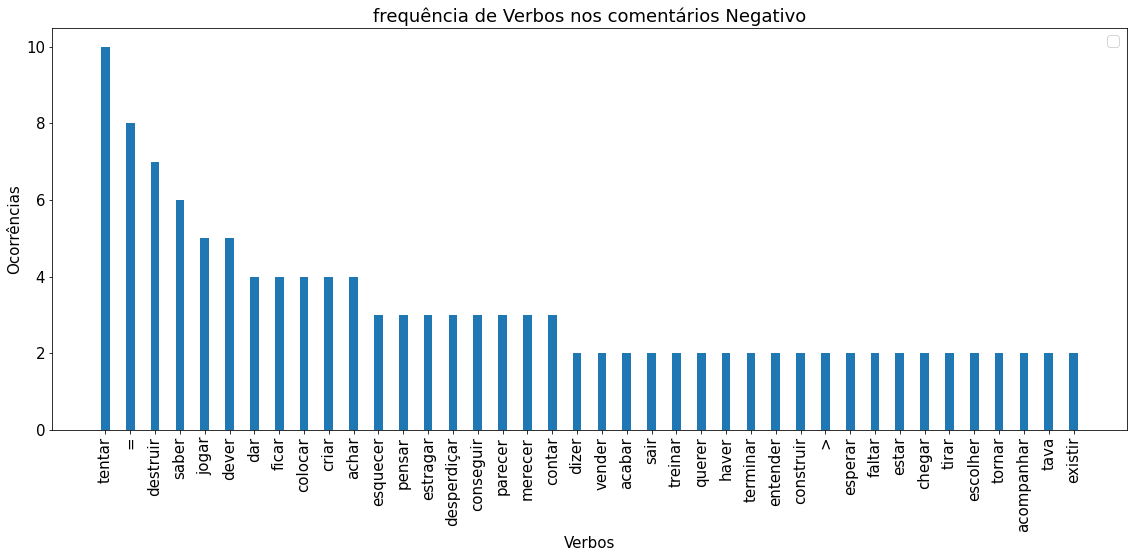

In [ ]:
for item in elementos_comuns:
    fDist_verb_neg.__delitem__(item)

print(fDist_verb_neg)
plota_grafico_freq(fDist_verb_neg,'Negativo','Verbos') 

No handles with labels found to put in legend.
<FreqDist with 157 samples and 249 outcomes>


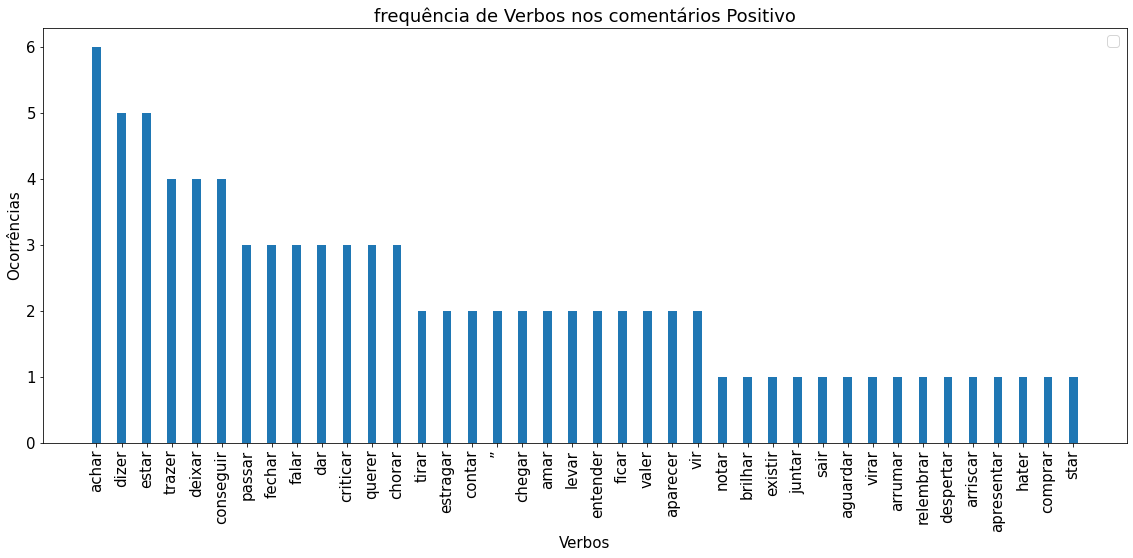

In [ ]:
for item in elementos_comuns:
    fDist_verb_pos.__delitem__(item)

print(fDist_verb_neg)
plota_grafico_freq(fDist_verb_pos,'Positivo','Verbos') 

In [ ]:
word_tag_fd = nltk.FreqDist(tagged_positivo)

In [ ]:
adjetivos_comuns = [wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'adj']
adjetivos_comuns[:10]

['bom',
 'nova',
 'ótimo',
 'épico',
 'maior',
 'melhor',
 'novo',
 'ótima',
 'último',
 'últimos']

In [ ]:
mais_comuns2_neg = []
mais_comuns2_pos = []
for i in range(15):
    mais_comuns2_neg.append(fDist_adj_k.most_common()[i][0])
    mais_comuns2_pos.append(fDist_adj_pos.most_common()[i][0])

In [ ]:
print(mais_comuns2_neg)

['pior', 'fraco', 'melhor', 'final', 'bom', 'novo', 'último', 'nova', 'boa', 'ruim', 'especial', 'original', 'grande', 'confuso', 'preguiçoso']


In [ ]:
print(mais_comuns2_pos)

['ótimo', 'bom', 'melhor', 'último', 'nova', 'maior', 'novo', 'épico', 'increr', 'emocionante', 'excelente', 'boa', 'rápido', 'verdadeiro', 'diferente']


In [ ]:
elementos_comuns2 = []
print(len(mais_comuns2_pos))
for element in mais_comuns2_neg:
    if element in mais_comuns2_pos:
        elementos_comuns2.append(element)

# mostra elementos que estão no top 15 de repetições tanto nas críticas positivas quanto nas negativas
print(elementos_comuns2)

15
['melhor', 'bom', 'novo', 'último', 'nova', 'boa']


No handles with labels found to put in legend.
<FreqDist with 95 samples and 138 outcomes>


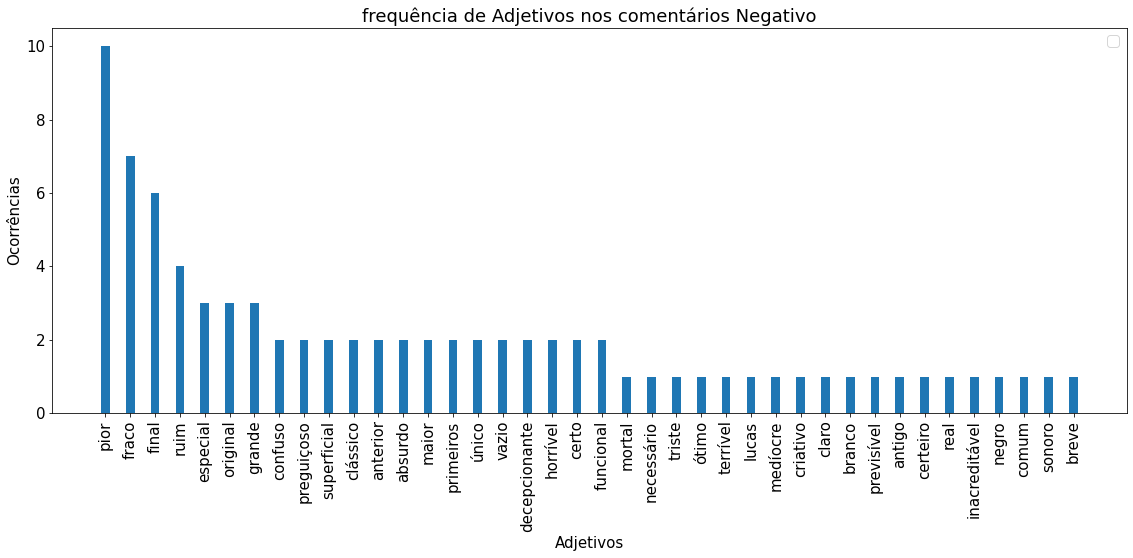

In [ ]:
for item in elementos_comuns2:
    fDist_adj_k.__delitem__(item)

print(fDist_adj_k)
plota_grafico_freq(fDist_adj_k,'Negativo','Adjetivos') 

No handles with labels found to put in legend.
<FreqDist with 75 samples and 101 outcomes>


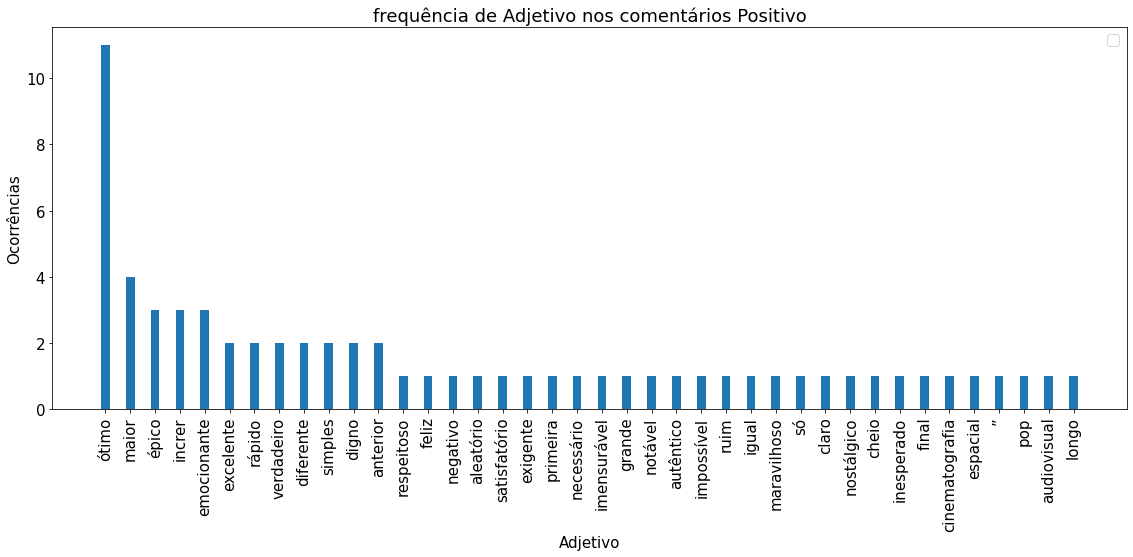

In [ ]:
for item in elementos_comuns2:
    fDist_adj_pos.__delitem__(item)

print(fDist_adj_pos)
plota_grafico_freq(fDist_adj_pos,'Positivo','Adjetivo') 

In [ ]:
mais_comuns3_neg = []
mais_comuns3_pos = []
for i in range(15):
    mais_comuns3_neg.append(fDist_subst_neg.most_common()[i][0])
    mais_comuns3_pos.append(fDist_subst_pos.most_common()[i][0])

In [ ]:
print(mais_comuns3_neg)

['filme', 'trilogia', 'personagem', '=', 'saga', 'roteiro', 'história', 'final', '>', 'content', 'coisa', 'episódio', 'força', 'mulher', 'batalha']


In [ ]:
print(mais_comuns3_pos)

['filme', 'final', 'saga', 'fã', 'história', 'tempo', 'ação', 'franquia', 'coisa', 'episódio', 'conclusão', 'pena', 'cena', 'wars', 'desfecho']


In [ ]:
elementos_comuns3 = []
print(len(mais_comuns3_pos))
for elemento in mais_comuns3_neg:
    if elemento in mais_comuns3_pos:
        elementos_comuns3.append(elemento)

# mostra elementos que estão no top 15 de repetições tanto nas críticas positivas quanto nas negativas
print(elementos_comuns3)

15
['filme', 'saga', 'história', 'final', 'coisa', 'episódio']


No handles with labels found to put in legend.
<FreqDist with 236 samples and 412 outcomes>


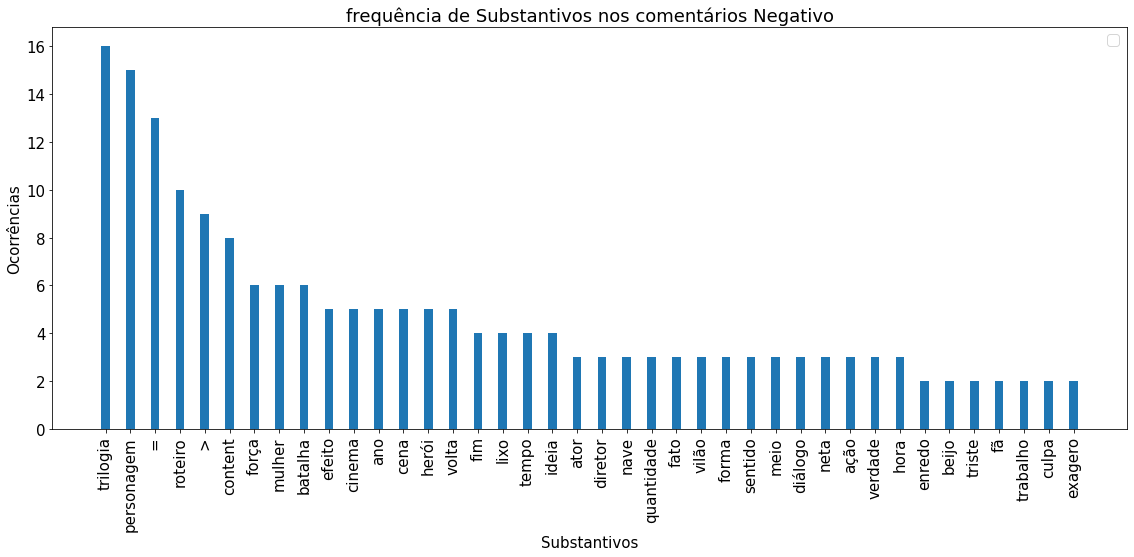

In [ ]:
for item in elementos_comuns3:
    fDist_subst_neg.__delitem__(item)

print(fDist_subst_neg)
plota_grafico_freq(fDist_subst_neg,'Negativo','Substantivos') 

No handles with labels found to put in legend.
<FreqDist with 174 samples and 227 outcomes>


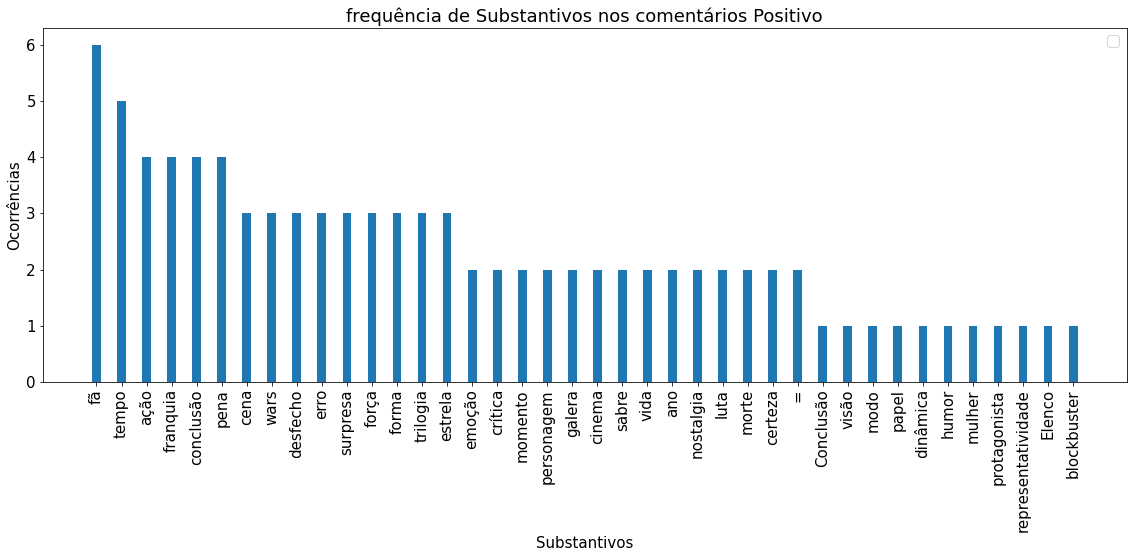

In [ ]:
for item in elementos_comuns3:
    fDist_subst_pos.__delitem__(item)

print(fDist_subst_pos)
plota_grafico_freq(fDist_subst_pos,'Positivo','Substantivos') 

# Análise com concordance

In [ ]:
tags = [a[0] for (a, b) in nltk.bigrams(tagged_positivo) if b[0] == 'ótimo']
fd= nltk.FreqDist(tags)
fd.tabulate()

 Um  um Foi 
  2   1   1 


Usando concordance vamos observar como os substantivos que se repetem em ambos os corpos aparecem nas avaliações

In [ ]:
from nltk.corpus import gutenberg
from nltk.text import Text
corpus = corpus_critica_positiva.words()
text = Text(corpus)

In [ ]:
#['filme', 'saga', 'história', 'final', 'coisa', 'episódio'] vamos analisar para os positivos e depois para os negativos

In [ ]:
text.concordance("filme")

Displaying 25 of 41 matches:
enas visões aleatórias , esse último filme dessa nova franquia , se encerra de 
tão exigente assim , afinal é aquele filme bem redondinho , cumpre o seu papel 
r " e é impossível dizer , que algum filme dessa franquia é ruim . Não vejo o p
o o porquê da galera não gosta desse filme , assim como a galera não gosta dos 
 últimos dois , são ótimos !! Melhor filme que já assisti . STAR WARS 9 entrega
services exagerados , é um excelente filme , q traz as respostas q os fãs queri
que aliás e a maior de toda a saga . Filme maravilhoso !! As batalhas , o desfe
 coisas de todas as trilogias num só filme ! Me emocionei de vdd ! Pra mim não 
va lotado ainda por cima ) e achei o filme incrível , só aguardar a nota da aud
 ". Está tudo ao contrário .< br > O filme é épico demais ! Mas é claro , tem a
 mas eles não estragam a essência do filme . Boa sorte pra quem ainda vai assis
a quem ainda vai assistir também ! O filme foi excelente muito nostálgico e che
aga . Pelo 

In [ ]:
text.concordance("saga")

Displaying 8 of 8 matches:
ação , que aliás e a maior de toda a saga . Filme maravilhoso !! As batalhas ,
Canônica ! Um ótimo encerramento pra saga . Pelo erro de The Last Jedi , o fil
o melhor contada Star Wars é a maior saga cinematográfica de todos os tempos ,
! < br > Uma belíssima conclusão pra saga ! < br > Sensacional ! Vou falar eu 
uito do seu Um ótimo desfecho para a saga . Uma pena a Carie Fisher ter morrid
é meu filme favorito e o final que a saga skywalker merece . Ótimos efeitos es
ico . Uma das melhores conclusões de saga de todos os tempos !!! As cenas São 
iticar a Disney e todos os filmes da Saga , eu sou fã incondicional e tirando 


In [ ]:
text.concordance("história")

Displaying 6 of 6 matches:
e . Ótimos efeitos especiais e uma história que é realmente muito emocionante 
tempos !!! As cenas São lindas , a história não é um primor porque se apoia mu
problema é a Disney que estragou a história toda O filme foi emocionante ! Tro
incrível . Muito bem feito com uma história que consegue fechar bem a história
história que consegue fechar bem a história . Algumas situações estranhas , ma
ney por não deixar os fãs sem essa história fantástica . e que venham logo out


In [ ]:
text.concordance("final")

Displaying 11 of 11 matches:
 Final épico e respeitoso com os fãs ... Im
 ... Assistam ... Que Incrível , que final feliz ! Apesar de ver muitas crítica
dd ! Pra mim não poderia ter tido um final melhor !! Acabei de sair do cinema (
 mais . < br > Achei que o confronto final entre Rey e Palpatine poderia ser me
as ou enrolação . Abrams entregou um final agridoce , digamos que até confortáv
s esse filme ficou muito digno de um final eu só não entendi muitas coisas vári
o Skywalker é meu filme favorito e o final que a saga skywalker merece . Ótimos
ue os 2 dessa nova geração ! Teve um final bem elaborado . Ela foi uma ótima at
bem diagramadas . Em particular , no final do filme , a atuação da Rey foi ótim
filmes antigos muito fanservice e um final brilhante realmente vale a pena a ve
or mim poderia ter sim 1 por ano . O final aliás me deixou com algumas dúvidas 


In [ ]:
text.concordance("coisa")

Displaying 1 of 1 matches:
Jedi , o filme tem que arrumar muita coisa em pouco tempo , e isso é feito de u


In [ ]:
text.concordance("episódio")

Displaying 4 of 4 matches:
 assim como os críticos fizeram no Episódio 8 , agora o jogo vai virar .< br >
ordagem diferente , assim como , o episódio 8 teve em relação ao episódio 7 .<
 , o episódio 8 teve em relação ao episódio 7 .< br > O filme tem bastante hat
 tem bastante hater ( assim como o Episódio 1 e o 8 ), mas minha recomendação 


In [ ]:
text.concordance("trilogia")

Displaying 3 of 3 matches:
que até confortável para essa nova trilogia que ele mesmo iniciou de forma mui
o Star Wars . Um ótima conclusão a trilogia ! < br > Uma carta de amor aos fãs
uitas informações É o melhor dessa trilogia da Disney ! Não é perfeito , mas é


In [ ]:
from nltk.corpus import gutenberg
from nltk.text import Text
corpus = corpus_critica_negativa.words()
text_negativa = Text(corpus)

In [ ]:
text_negativa.concordance("filme")

Displaying 25 of 41 matches:
Pior filme da saga . Fraco . Enredo e roteiro c
ar Wars . Coitado do Gerorge Lucas . Filme fraco , enredo Hollywoodiano forçado
superficiais . Bons atores mas em um filme medíocre . Sem nada de novo e sem na
 George , claro . Sem condições esse filme , total decepção . Foi a confirmação
m dia se desculpem desse desastre de filme De doer ! Eu sei que hoje é só dinhe
s de 40 anos atrás ? Só faltou nesse filme a cena clássica que uma nave do " he
a . Mulher não é assim ! Ao final do filme me senti envergonhado do que tentara
 era bom . Esse episódio IX é o pior filme da saga . Muito triste o que fizeram
er mulher com mulher se beijando num filme Stars Wars . A quantidade de pessoas
ó acho forçação de barra . Quanto ao filme o que salva pra mim , ainda é a tril
e nesta crítica . Eu reconheço que o filme tem batalhas de sabre de luz excelen
a toda a construção da personagem no filme anterior , a trama é episódica e sua
 não conseguem ser bem emendadas , o filme 

In [ ]:
text_negativa.concordance("saga")

Displaying 12 of 12 matches:
Pior filme da saga . Fraco . Enredo e roteiro confuso e
inema meio triste , afinal sou fã da saga . Mas devo dizer que o trabalho dos 
anca para que JJ Abrams destruísse a saga , com um roteiro fraco , superficial
. Esse episódio IX é o pior filme da saga . Muito triste o que fizeram com a r
 o que fizeram com a reputação que a saga Star Wars tem . É inacreditável . Nu
ser sem sabor e tmb forçado para uma saga impactante que acompanhava desde o f
lha final desorronsa pra um final de saga que ñ chega à altura do padrão Star 
derado uma estrela e meia por ser da Saga Star Wars , Vamos la com Spoiler < s
da pior do q está filme destruiu uma saga incrível HORROROSO destruiu até o pe
 Essa trilogia da Disney pega toda a saga clássica e joga tudo no lixo .< br >
ernas , que não tem nada haver com a saga .< br >< br > Essa trilogia é uma Ve
o . Uma pena . É o primeiro filme da saga que só assisti uma vez . Não quero v


In [ ]:
text_negativa.concordance("história")

Displaying 10 of 10 matches:
odiano forçado , tentam reciclar a história uma história que já foi contada an
o , tentam reciclar a história uma história que já foi contada antes adicionan
om a marca Disney de personagens e história infantilizada . Triste fim o da sé
 A mulher pode ser protagonista da história , mas com sabedoria , sensibilidad
lha sonora e os efeitos . Elenco e história pode jogar no lixo . Vou ser breve
rs idealizado por George Lucas é a história de Anakin Skywalker , que no final
fluência , mesmo que indireta , na história , por exemplo ( imaginem o Kylo Re
eitar esta trilogia . Para mim , a história contada em Star Wars termina no ep
ram merda , mas não só isso como a história em geral ficou um lixo Péssimo ! A
em geral ficou um lixo Péssimo ! A história não é ruim , mas foi mal contada .


In [ ]:
text_negativa.concordance("final")

Displaying 14 of 14 matches:
 especiais em 3D . Sinceramente , um final triste pra uma trilogia fraca . < br
 violência . Mulher não é assim ! Ao final do filme me senti envergonhado do qu
opósito , o melhor da trilogia , e o final é uma reprodução do final do episódi
ogia , e o final é uma reprodução do final do episódio 6 , mas levando em consi
istória de Anakin Skywalker , que no final das contas era o escolhido . O episó
 Wars termina no episódio VI e ponto final . Um filnal tão frio quanto o filme 
a impactante que acompanhava desde o final dos anos 70 . Naquele tempo sobrava 
o horríveis , inclusive a da batalha final . Eu acho que Star Wars merecia um "
. Eu acho que Star Wars merecia um " final " melhor . O vilão é fraco , a mocin
le pelo Wedge que aparece na batalha final e aquele Poe Dameron é um dos piores
a Falcon ! Filme pouco cativante com final genérico e uma batalha final desorro
nte com final genérico e uma batalha final desorronsa pra um final de saga que 
 uma batalh

In [ ]:
text_negativa.concordance("coisa")

Displaying 2 of 2 matches:
is do mesmo . Falhas mortais . Muita coisa desnecessária . Nem poderia ser cham
ilogia estragou tudo . A culpa dessa coisa horrenda é Disney e desses diretores


In [ ]:
text_negativa.concordance("episódio")

Displaying 7 of 7 matches:
nsagração dos meus receios vendo o episódio 7 e 8 . A Disney comprou a marca S
agaram com algo que era bom . Esse episódio IX é o pior filme da saga . Muito 
final é uma reprodução do final do episódio 6 , mas levando em consideração a 
nal das contas era o escolhido . O episódio 7 , ao acabar com a paz na galáxia
 , mas , até aí , é perdoável . No episódio 9 , poderiam consertar isso com o 
 vazio .</ span > </ span > Último episódio decepcionante de uma trilogia igua
ia contada em Star Wars termina no episódio VI e ponto final . Um filnal tão f


In [ ]:
text_negativa.concordance("trilogia")

Displaying 16 of 16 matches:
eramente , um final triste pra uma trilogia fraca . < br >< span class =" spoi
 da disney e diretores . Essa nova trilogia e o seu desfecho não é nada mais "
 que é , à propósito , o melhor da trilogia , e o final é uma reprodução do fi
timo episódio decepcionante de uma trilogia igualmente decepcionante . Dos nov
alvação . Me recuso a aceitar esta trilogia . Para mim , a história contada em
s dois primeiros filmes dessa nova trilogia não são perfeitos mas eu até que g
 franquia de 40 anos . Essa última trilogia é pra esquecer . Assisti e não gos
tos funcionais . Esse filme e essa trilogia , é uma piada de mal gosto , só qu
cha que foi um bom filme e uma boa trilogia .< br >< br > ASCENSÃO SKYWALKER S
ido nesse filme .< br >< br > Essa trilogia é a pior de todas , conseguiu ser 
ep I , II e III .< br >< br > Essa trilogia da Disney pega toda a saga clássic
aver com a saga .< br >< br > Essa trilogia é uma Vergonha !!!!!< br >< br > P
o seu melhor , mas o ro

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2bdbb82-530b-4b71-85fb-c683a0c0911d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>